In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%matplotlib inline

# Imports

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Set plot style
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams["font.size"] = 12
%config InlineBackend.figure_format = 'retina'
# Set color palette

# Load Data

In [ ]:
# set working directory to project root - EXECUTE ONLY ONCE or RESTART KERNEL
os.chdir("..")
os.getcwd()

# Simulate Data


#### Base Time series with seasonality and regular noise
* **Baseline** is a constant value, representing the baseline incidence
* **Seasonality** is simulated as a sine wave with a given amplitude
* **Noise** is simulated as a Poisson distribution with a given mean
* --> Time series = Baseline + Seasonality + Noise

Parameters:
* Inzidenz: 10-50 Fälle pro Woche (Basisniveau).
* Ausbruch: Erhöhung um das 2- bis 5-Fache des Basisniveaus.

In [142]:
# Parameter für die Simulation
np.random.seed(42)
n_weeks = 52 * 5  # 5 years of weekly data
amplitude = 50  # Seasonal amplitude of cases
baseline = 20  # Baseline level of cases
noise_level = 10  # Random noise level
outbreak_weeks = [50, 150]  # Weeks of outbreaks
outbreak_strength = [50, 100]  # Strength of outbreaks
seasonality = 52  # Seasonal cycle length

In [140]:
# Basisinzidenz
time = np.arange(n_weeks)
seasonal_component = amplitude * np.sin(2 * np.pi * time / seasonality)
incidence = baseline + seasonal_component + np.random.normal(0, 5, n_weeks)

In [141]:
incidence

array([ 32.48357077,  35.33551251,  45.2042259 ,  55.34539363,
        52.06539173,  57.23255255,  71.05219699,  71.26271105,
        68.80182137,  76.9856015 ,  74.43372367,  76.2184421 ,
        80.84525506,  70.43359878,  71.01085454,  75.73565323,
        71.68665653,  75.84403795,  66.60907292,  60.3640189 ,
        70.48437676,  57.27435583,  53.57379963,  40.60650342,
        39.24386959,  36.58144696,  24.24503211,  25.85165608,
        15.03102334,  10.8112869 ,   3.75530834,  10.85815359,
        -3.22361904, -12.71409205,  -7.03646873, -20.37701953,
       -15.70649416, -28.34544149, -26.27637395, -19.01569382,
       -15.9431108 , -17.69024947, -17.32905355, -15.77831976,
       -18.54180325, -11.02475845,  -5.45932677,   6.88237379,
         8.48193285,   3.45455487,  19.65463663,  22.04775459,
        26.61539   ,  39.08521546,  47.12078083,  52.38664495,
        49.04007099,  56.85717546,  64.81245007,  72.30326304,
        68.75332211,  73.3445064 ,  71.21913726,  72.56

In [143]:
# Add outbreak
for week, strength in zip(outbreak_weeks, outbreak_strength):
    incidence[week : week + 3] += strength

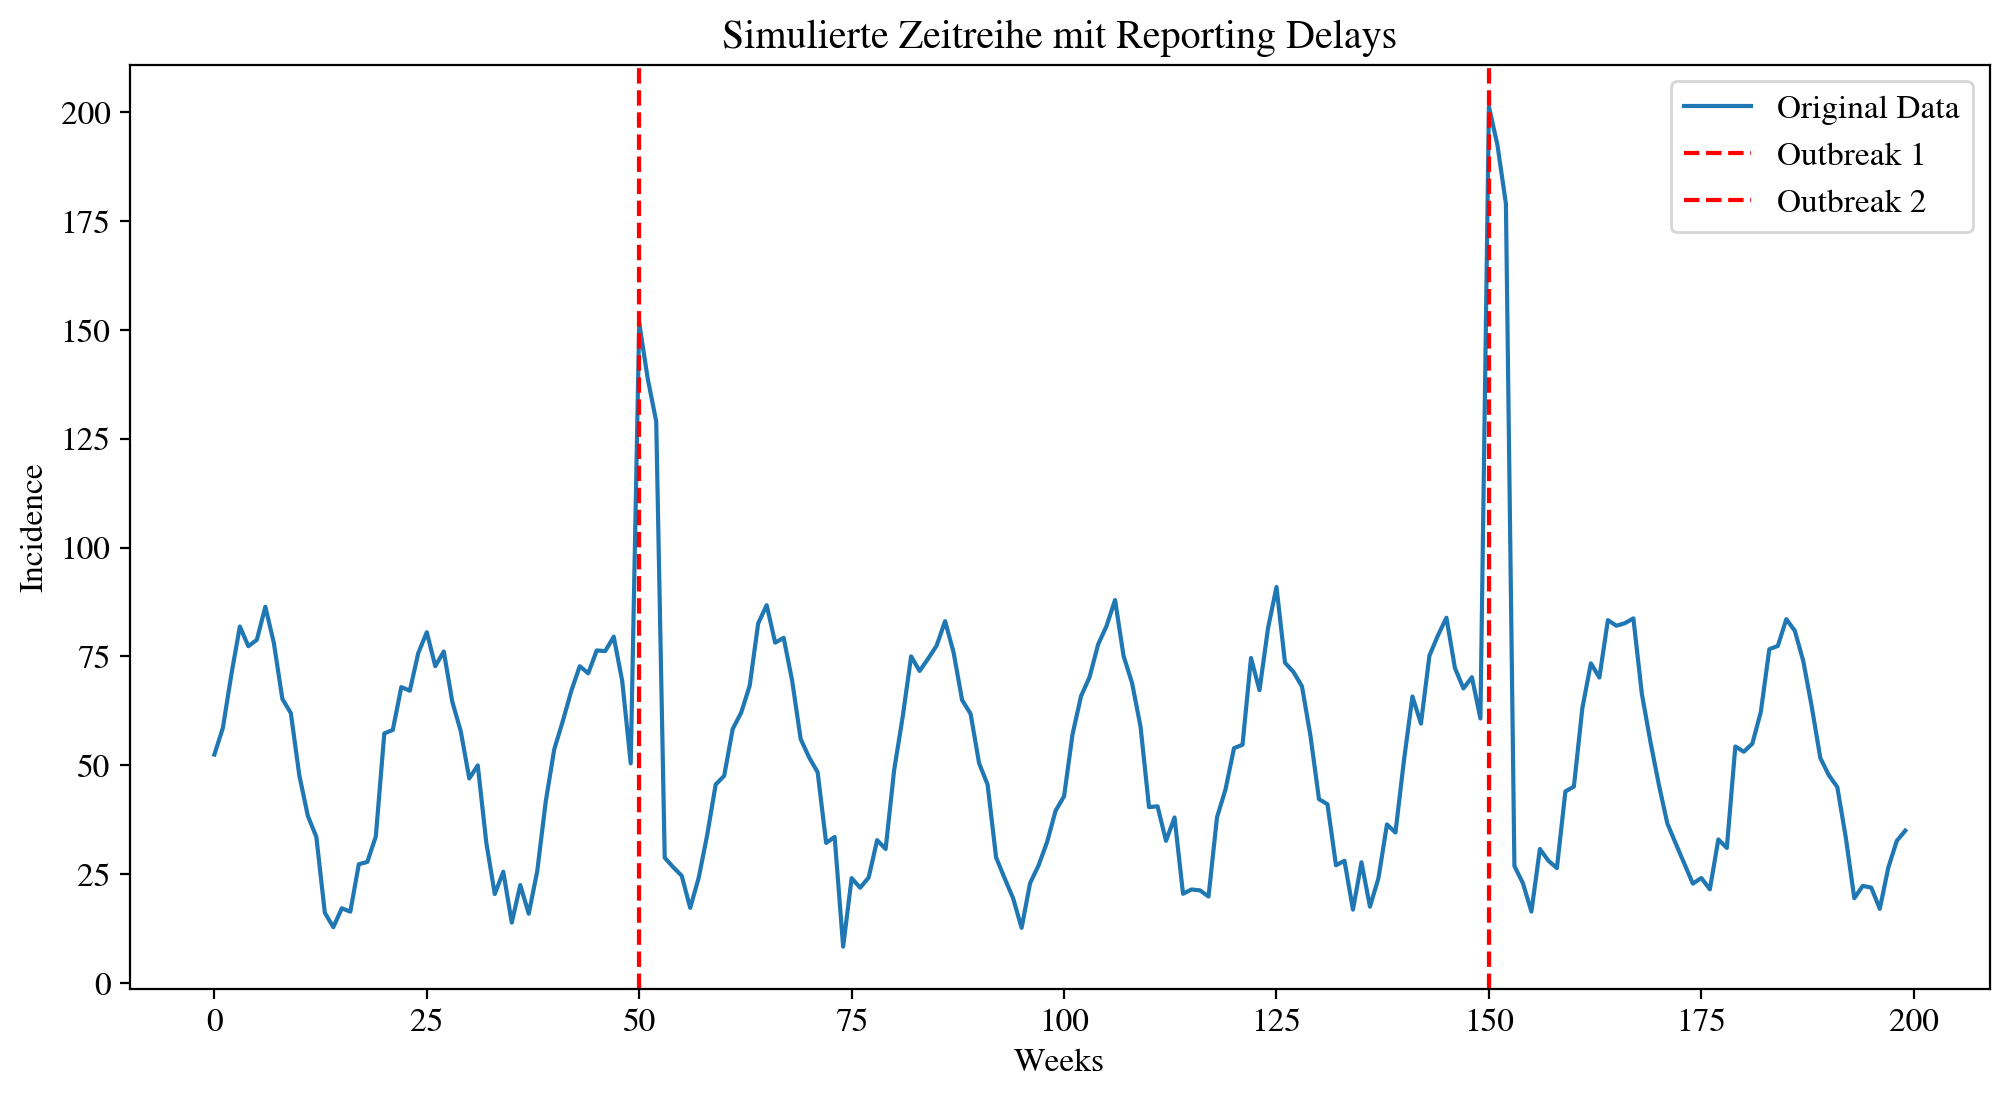

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(time, incidence, label="Original Data")
plt.axvline(x=50, color="red", linestyle="--", label="Outbreak 1")
plt.axvline(x=150, color="red", linestyle="--", label="Outbreak 2")
plt.title("Simulierte Zeitreihe mit Reporting Delays")
plt.xlabel("Weeks")
plt.ylabel("Incidence")
plt.legend()

#### Reporting delays
**Reporting delay** is the time gap between the occurrence of a health event (such as the onset of symptoms, diagnosis, hospitalization, or death) and the reporting of the case to public health authorities as well as the official in public health databases. Logically thus the values are always a bit lower than actual since the curent data is always a bit behind the actual data.
Kinds of reporting delays:
* **Periodic delay**: Periodic delays (e.g., weekly reporting).
* **Constant delay**: A fixed delay for all days (e.g., 2-5 days).
* **Varying delay**: Log-normally distributed delays (mean = 3 days, SD = 1 day).
* **Episodic delays**: Random days with delays (e.g. 5-10 days on holidays).


In [65]:
df = pd.DataFrame({"Day": time, "Incidence": incidence})

In [38]:
# Szenario 1: Periodische Meldeverzögerungen (Note: Values of a time series with reporting delays, in comparison to the original without reproting delays, are always a bit higher or at least at the same level.)

In [40]:
# Szenario 2: Konstante Meldeverzögerungen

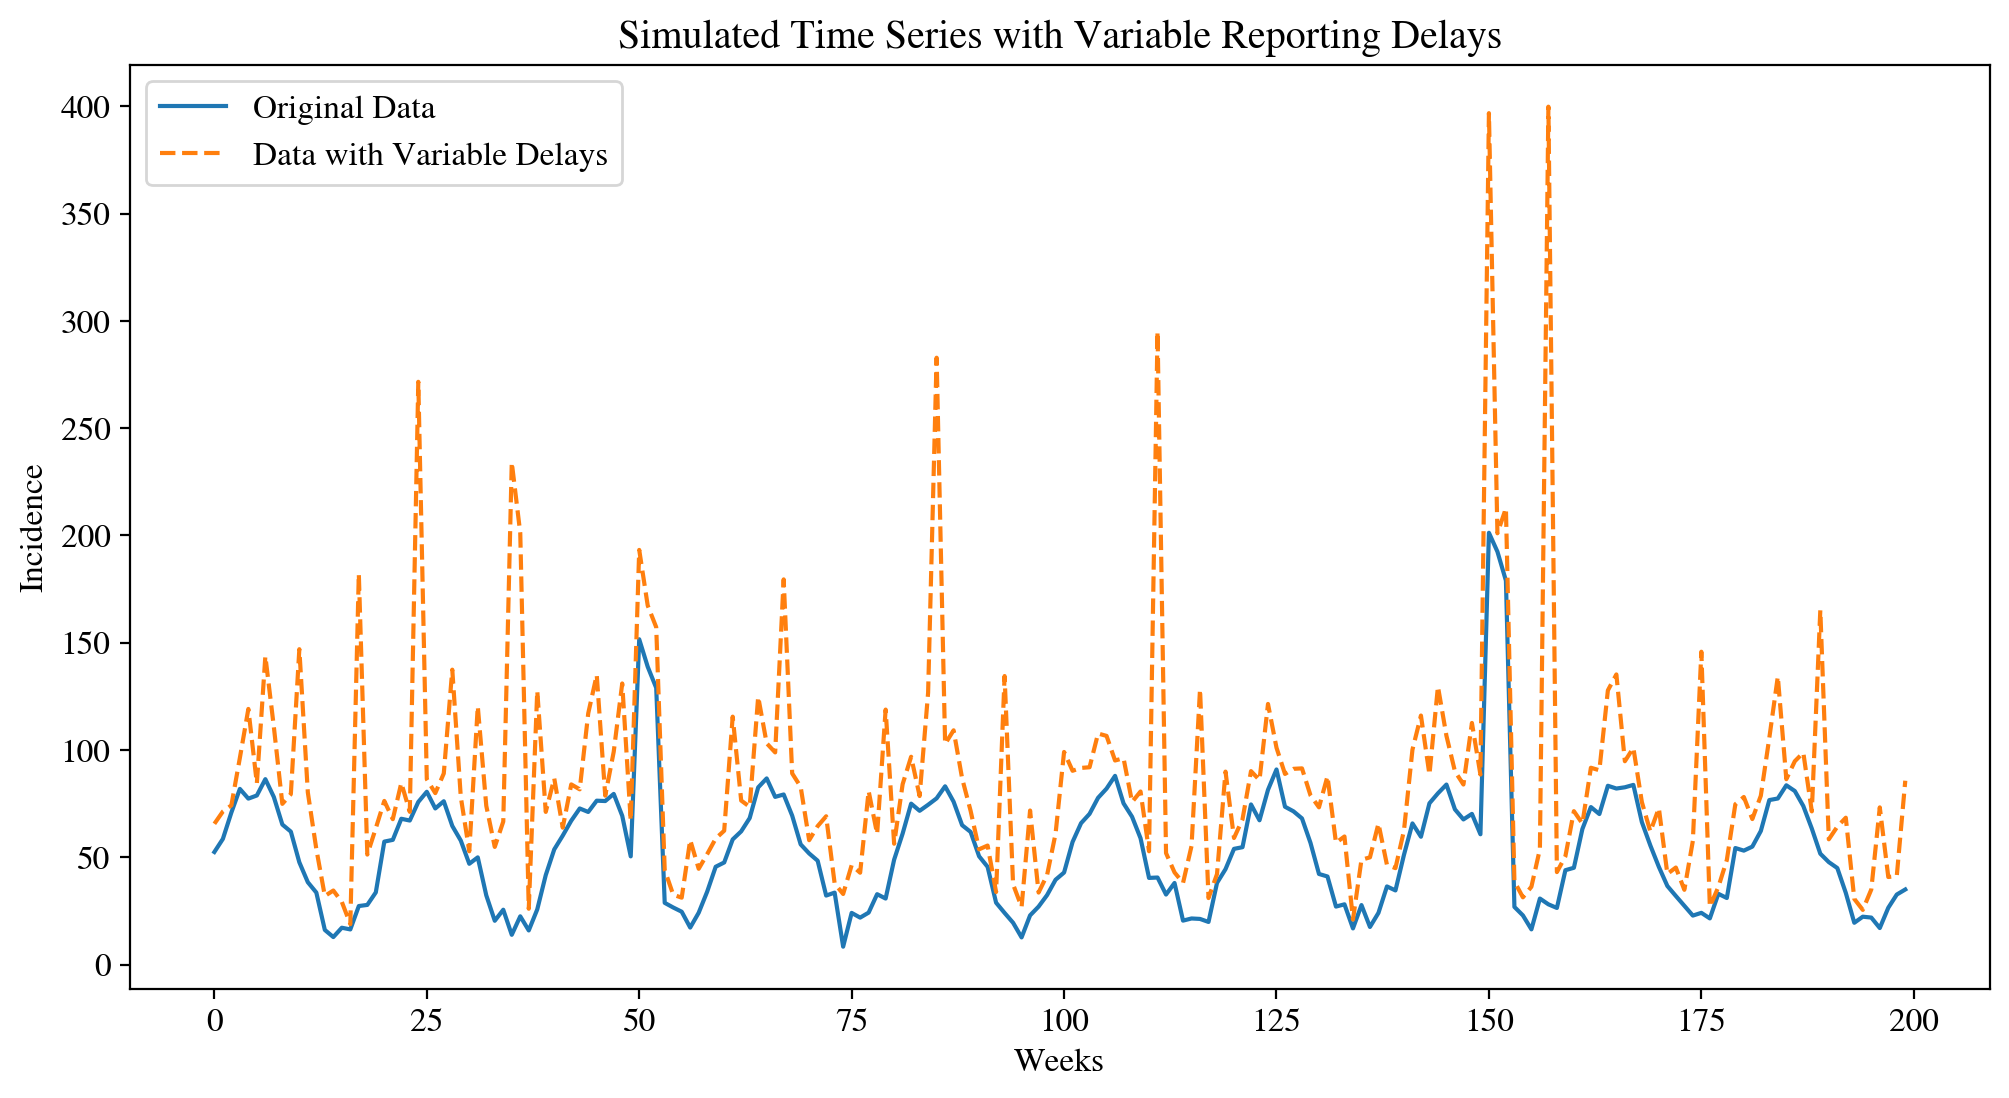

In [93]:
# Szenario 3: Variable Meldeverzögerungen (log-normal verteilt)
variable_delay = np.random.lognormal(mean=3, sigma=1, size=weeks)
df["variable_delay"] = variable_delay

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time, df["Incidence"], label="Original Data")
plt.plot(
    time,
    df["Incidence"] + df["variable_delay"],
    label="Data with Variable Delays",
    linestyle="--",
)
plt.title("Simulated Time Series with Variable Reporting Delays")
plt.xlabel("Weeks")
plt.ylabel("Incidence")
plt.legend()

In [56]:
# Szenario 4: Episodische Meldeverzögerungen
days = np.arange(weeks)
episodic_days = np.random.choice(days, size=50, replace=False)  # 50 zufällige Tage
episodic_delays = baseline_data.copy()
episodic_delays[episodic_days] = 0
episodic_delays[episodic_days + 2] += baseline_data[episodic_days]
baseline_data["Episodic_Delay"] = episodic_delays

plt.figure(figsize=(12, 6))
plt.plot(time, baseline_data, label="Original Data")
plt.plot(
    time,
    baseline_data["Episodic_Delay"],
    label="Data with Episodic Delays",
    linestyle="--",
)
plt.title("Simulated Time Series with Episodic Reporting Delays")
plt.xlabel("Weeks")
plt.ylabel("Incidence")
plt.legend()

IndexError: index 201 is out of bounds for axis 0 with size 200

# Outbreak Detection


#### 1. Threshold-based detection

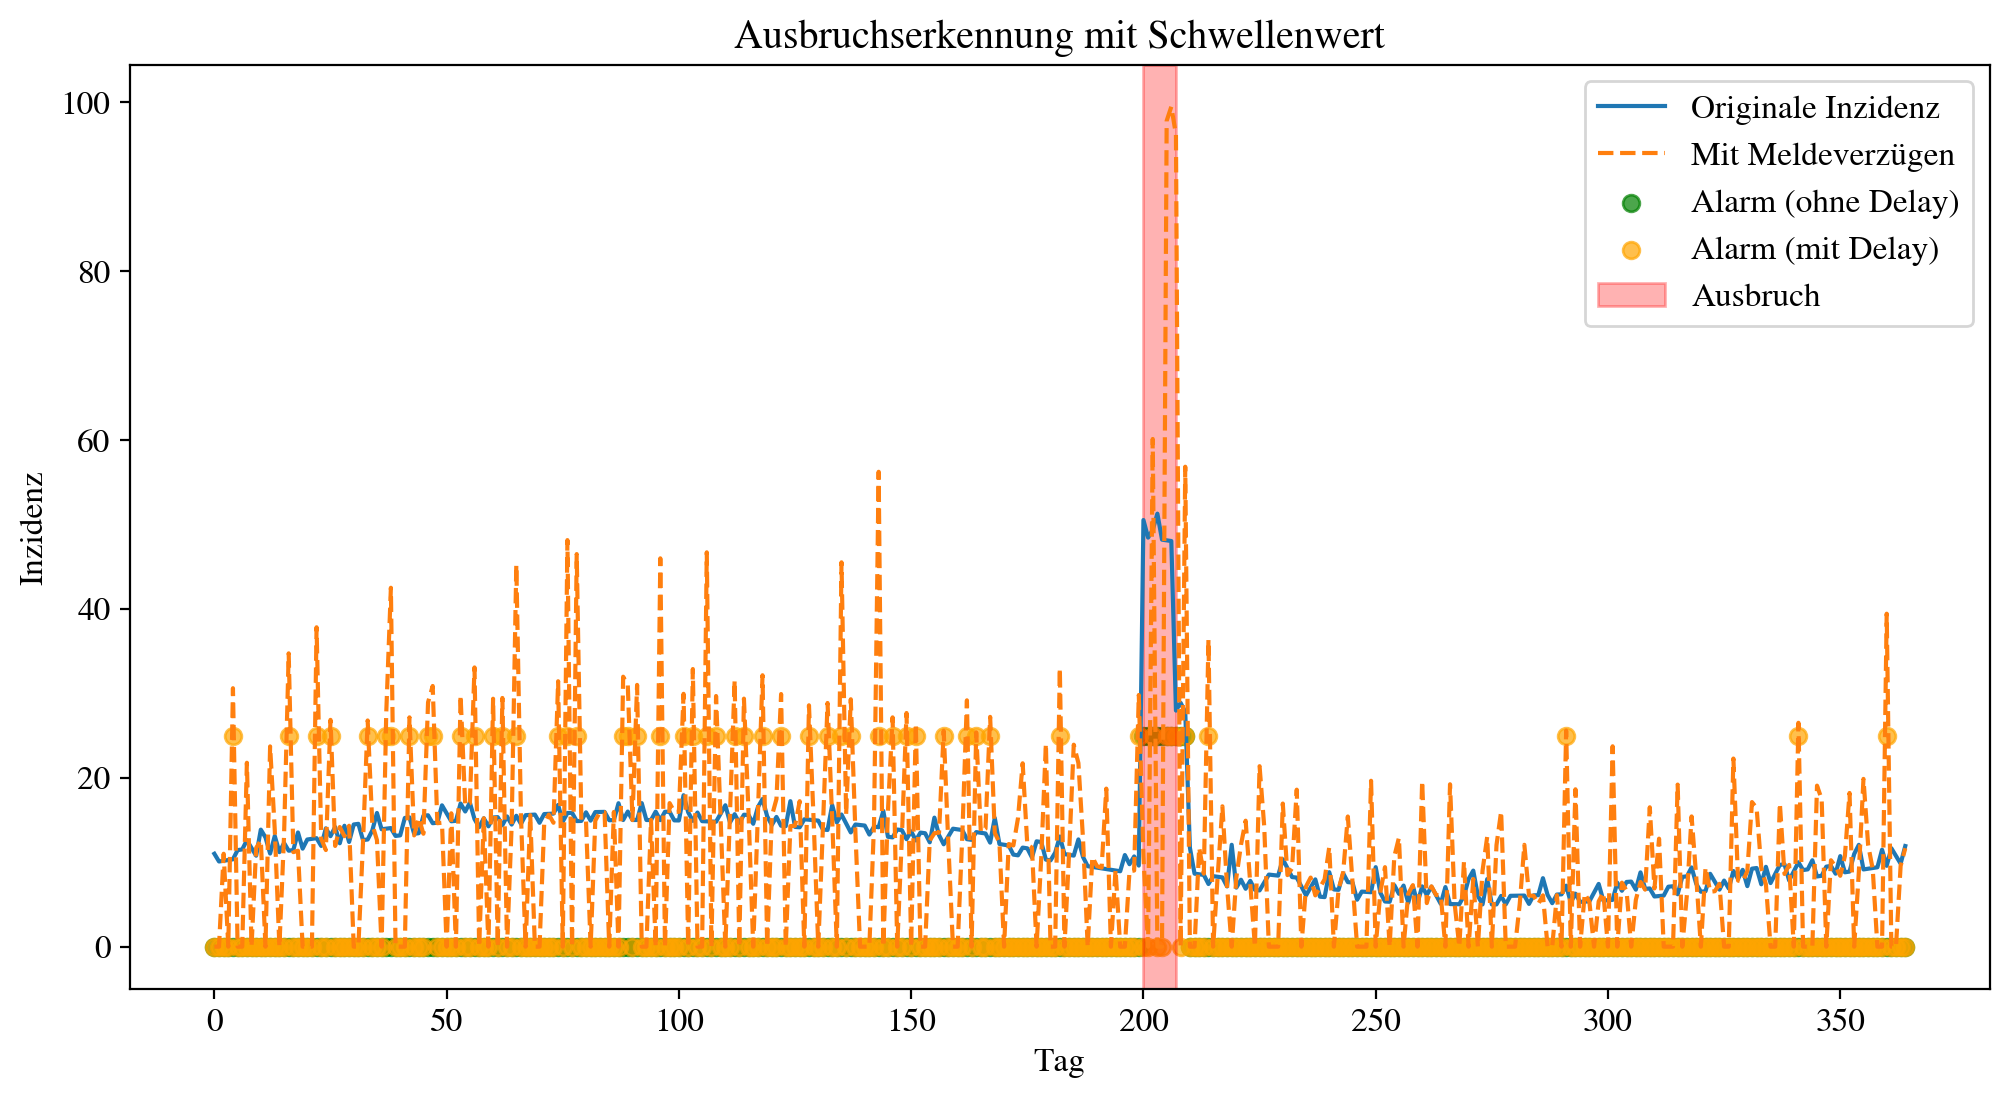

In [18]:
threshold = baseline + seasonality_amplitude + 10

# Alarme ohne und mit Reporting Delays
df["Alarm_No_Delay"] = df["Incidence"] > threshold
df["Alarm_With_Delay"] = df["Delayed_Incidence"] > threshold

# Plot der Alarme
plt.figure(figsize=(12, 6))
plt.plot(df["Day"], df["Incidence"], label="Originale Inzidenz")
plt.plot(df["Day"], df["Delayed_Incidence"], label="Mit Meldeverzügen", linestyle="--")
plt.scatter(
    df["Day"],
    df["Alarm_No_Delay"] * threshold,
    color="green",
    label="Alarm (ohne Delay)",
    alpha=0.7,
)
plt.scatter(
    df["Day"],
    df["Alarm_With_Delay"] * threshold,
    color="orange",
    label="Alarm (mit Delay)",
    alpha=0.7,
)
plt.axvspan(
    outbreak_start, outbreak_start + 7, color="red", alpha=0.3, label="Ausbruch"
)
plt.legend()
plt.xlabel("Tag")
plt.ylabel("Inzidenz")
plt.title("Ausbruchserkennung mit Schwellenwert")
plt.show()

#### 2. CUMSUM Algorithm

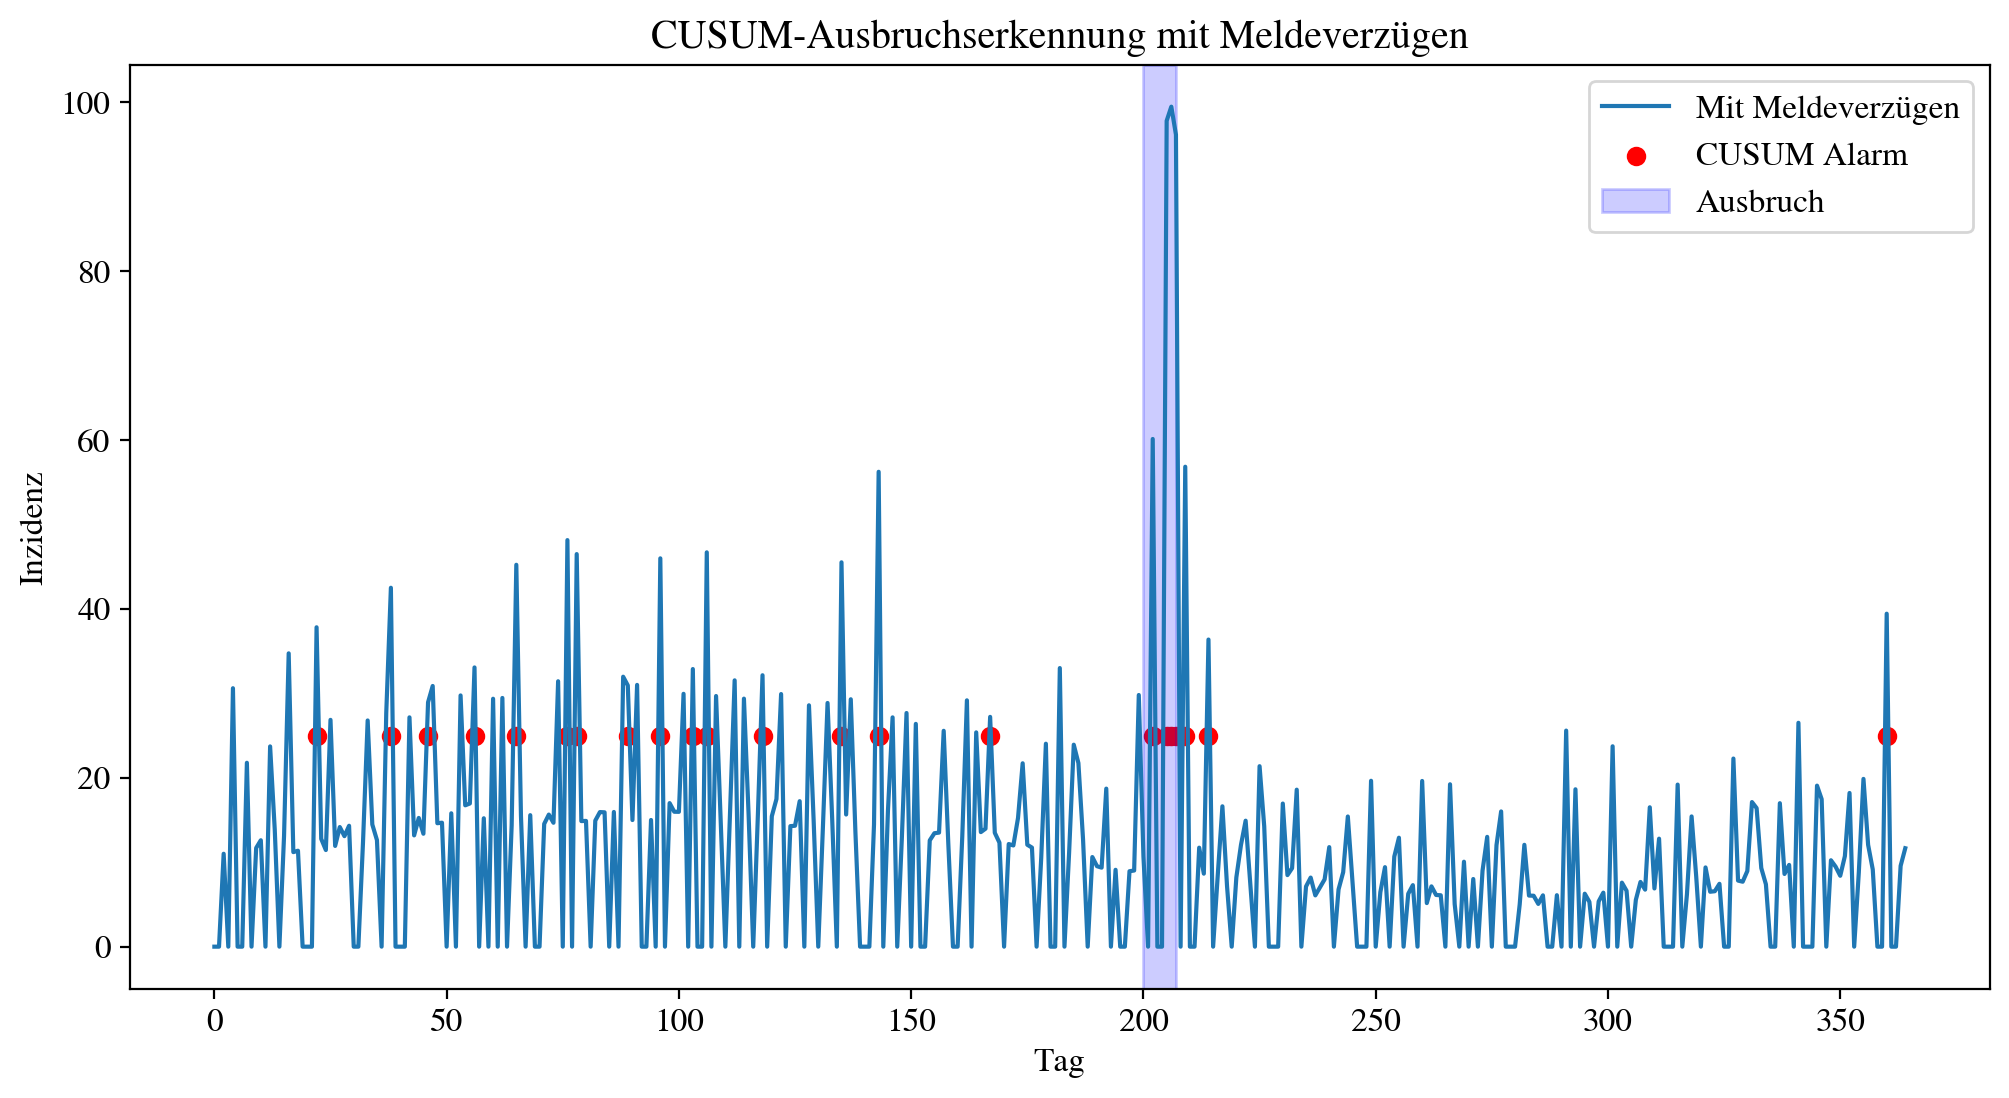

In [19]:
from scipy.stats import poisson


# CUSUM-Detektionslogik
def cusum(data, target_mean, h):
    s = np.zeros(len(data))
    alarms = []
    for i in range(1, len(data)):
        s[i] = max(0, s[i - 1] + (data[i] - target_mean))
        if s[i] > h:
            alarms.append(i)
            s[i] = 0  # Reset bei Alarm
    return alarms


# CUSUM-Analyse
h = 20
cusum_alarms = cusum(df["Delayed_Incidence"], baseline + seasonality_amplitude, h)

# Plot mit CUSUM
plt.figure(figsize=(12, 6))
plt.plot(df["Day"], df["Delayed_Incidence"], label="Mit Meldeverzügen")
plt.scatter(
    cusum_alarms, [threshold] * len(cusum_alarms), color="red", label="CUSUM Alarm"
)
plt.axvspan(
    outbreak_start, outbreak_start + 7, color="blue", alpha=0.2, label="Ausbruch"
)
plt.legend()
plt.xlabel("Tag")
plt.ylabel("Inzidenz")
plt.title("CUSUM-Ausbruchserkennung mit Meldeverzügen")
plt.show()

#### 3. Farrington Algorithm

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Saisonale Basislinie extrahieren
seasonal = seasonal_decompose(df["Incidence"], period=365, model="additive").seasonal

# Farrington-Methode
df["Farrington_Threshold"] = baseline + seasonal + 3 * np.sqrt(baseline + seasonal)
df["Farrington_Alarm"] = df["Incidence"] > df["Farrington_Threshold"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Day"], df["Incidence"], label="Originale Inzidenz")
plt.plot(
    df["Day"], df["Farrington_Threshold"], label="Farrington-Schwelle", linestyle="--"
)
plt.scatter(
    df[df["Farrington_Alarm"]]["Day"],
    df[df["Farrington_Alarm"]]["Incidence"],
    color="red",
    label="Farrington Alarm",
)
plt.legend()
plt.xlabel("Tag")
plt.ylabel("Inzidenz")
plt.title("Farrington Methode zur Ausbruchserkennung")
plt.show()

#### 4. ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA-Modellierung
model = ARIMA(df["Incidence"], order=(5, 1, 0))  # ARIMA(5,1,0) als Beispiel
fit = model.fit()

# Residuen analysieren
residuals = fit.resid
threshold = 3 * np.std(residuals)
df["ARIMA_Alarm"] = abs(residuals) > threshold

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Day"], residuals, label="ARIMA Residuen")
plt.axhline(y=threshold, color="red", linestyle="--", label="Schwelle")
plt.scatter(
    df[df["ARIMA_Alarm"]]["Day"],
    residuals[df["ARIMA_Alarm"]],
    color="orange",
    label="ARIMA Alarm",
)
plt.legend()
plt.xlabel("Tag")
plt.ylabel("Residuen")
plt.title("ARIMA-Modellierung und Alarmierung")
plt.show()

# Comparison of detection methods
* **True Positives (TP)**: Detected outbreak days that are true outbreak days
* **False Positives (FP)**: Detected outbreak days that are not true outbreak days
* **Sensitivity**: Fraction of days labeled as outbreak days that are actually outbreak days
* **Specificity**:

In [20]:
# Sensitivität und Spezifität berechnen
true_outbreak_days = set(range(outbreak_start, outbreak_start + 10))
detected_no_delay = set(df[df["Alarm_No_Delay"]].index)
detected_with_delay = set(df[df["Alarm_With_Delay"]].index)


# Sensitivität und Spezifität
def evaluate_performance(detected_days, true_days):
    true_positives = len(detected_days & true_days)
    false_positives = len(detected_days - true_days)
    false_negatives = len(true_days - detected_days)
    sensitivity = true_positives / len(true_days)
    specificity = 1 - (false_positives / (len(df) - len(true_days)))
    return sensitivity, specificity


sens_no_delay, spec_no_delay = evaluate_performance(
    detected_no_delay, true_outbreak_days
)
sens_with_delay, spec_with_delay = evaluate_performance(
    detected_with_delay, true_outbreak_days
)

print(
    f"Ohne Delays - Sensitivität: {sens_no_delay:.2f}, Spezifität: {spec_no_delay:.2f}"
)
print(
    f"Mit Delays - Sensitivität: {sens_with_delay:.2f}, Spezifität: {spec_with_delay:.2f}"
)

Ohne Delays - Sensitivität: 1.00, Spezifität: 0.99
Mit Delays - Sensitivität: 0.43, Spezifität: 0.86


In [ ]:
# Evaluierung aller Szenarien und Methoden
scenarios = ["Constant_Delay", "Variable_Delay", "Episodic_Delay"]
methods = ["Farrington_Alarm", "ARIMA_Alarm"]

results = []
for scenario in scenarios:
    for method in methods:
        detected_days = set(df[df[method]].index)
        true_positives = len(detected_days & true_outbreak_days)
        false_positives = len(detected_days - true_outbreak_days)
        false_negatives = len(true_outbreak_days - detected_days)
        sensitivity = true_positives / len(true_outbreak_days)
        specificity = 1 - (false_positives / (len(df) - len(true_outbreak_days)))
        avg_delay = np.mean(
            [day - outbreak_start for day in detected_days if day in true_outbreak_days]
        )
        results.append(
            {
                "Scenario": scenario,
                "Method": method,
                "Sensitivity": sensitivity,
                "Specificity": specificity,
                "Avg_Delay": avg_delay,
            }
        )

# Ergebnisse in DataFrame
results_df = pd.DataFrame(results)

# Ergebnis anzeigen
print(results_df)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Scenario", y="Sensitivity", hue="Method")
plt.title("Vergleich der Sensitivität")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Scenario", y="Avg_Delay", hue="Method")
plt.title("Durchschnittliche Verzögerung der Alarme")
plt.show()